In [1]:
import jax
import sys
import jax.numpy as jnp
import jax_cosmo as jc
sys.path.append('../source/')
from cosmo_jnp import cosmo, pantheon
from scipy.constants import c

## Introduce a cosmology

1. Jax cosmo. n_s and sigma8 are dummy values. They should have no effect.
2. Cosmo class from cosmo_jnp module. Data is to be loaded first.

In [2]:
cosmo_jax = jc.Cosmology(h=0.7, Omega_c = 0.25, Omega_b=0.05, w0=-1., wa=0., Omega_k=0, n_s=0.96, sigma8=0.83)
zz=jnp.linspace(0.,1,10000)
cosmo_jk = cosmo(0.7, zz);

In [3]:
p = pantheon('../data/pantheon.txt', '../data/pantheon_covsys.txt')

convert the redhift values to $a$ values

In [4]:
a_panth = jc.utils.z2a(zz)

Determing the distance modulus from the luminosity distance

In [5]:
#%%timeit
d_jc = (jc.background.angular_diameter_distance(cosmo_jax, a_panth)/a_panth**2)/cosmo_jax.h
mu_jc = 5*jnp.log10(d_jc) + 25;

/home/santiago/anaconda3/envs/diffstuff/lib/python3.10/site-packages/jax/_src/numpy/lax_numpy.py:4459: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


In [6]:
#%%timeit
cd = {'Omega_m' : 0.30,  'w_0':-1., 'w_1':0.}
d_jk = cosmo_jk.d_L(cosmo_jk.H_z(**cd))
mu_jk=cosmo_jk.dist_mod(cd)

(0.99, 1.02)

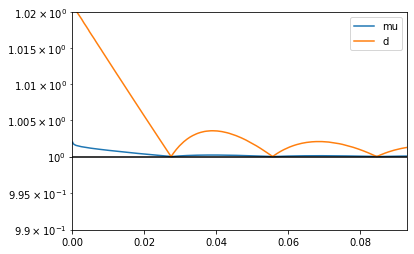

In [9]:
import matplotlib.pyplot as plt
plt.semilogy(zz, mu_jc/mu_jk, label='mu')
plt.semilogy(zz, d_jc/d_jk, label='d')
plt.legend()
plt.xlim(0., 0.0931)
plt.axhline(1, color='k')
plt.ylim(0.99,1.02)

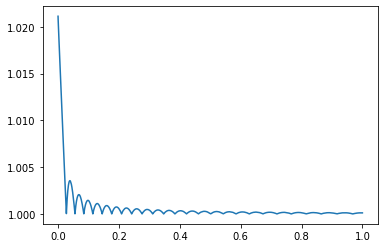

In [10]:
plt.plot(zz, d_jc/d_jk)

In [11]:
d_jc[0:2]

DeviceArray([0.        , 0.43740427], dtype=float32)

In [12]:
d_jk[0:2]

DeviceArray([0.        , 0.42835096], dtype=float32)

# Testing new cosmology object based on jax_cosmo

In [13]:
from cosmo_jnp import cosmo_jc

In [14]:
cosmo2 = cosmo_jc(0.7, zz)

In [15]:
mu2=cosmo2.dist_mod(cd)

/home/santiago/anaconda3/envs/diffstuff/lib/python3.10/site-packages/jax/_src/numpy/lax_numpy.py:4459: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


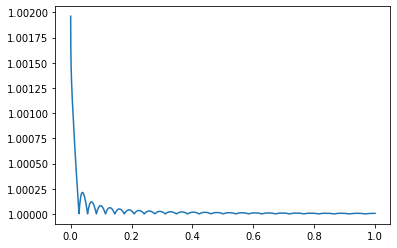

In [16]:
plt.plot(zz, mu2/mu_jk)

### Time comparison
1. cosmo

In [17]:
%%timeit
mu_jk=cosmo_jk.dist_mod(cd)

61.1 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


2. cosmo_jc

In [18]:
%%timeit
mu2=cosmo2.dist_mod(cd)

137 ms ± 835 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
